In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
#resize the images
img_width= 224
img_height = 224

In [3]:
train= r'C:\Users\rakes\Desktop\skin\skin_data\train'
test = r'C:\Users\rakes\Desktop\skin\skin_data\test'

In [4]:
folders = glob(r'C:\Users\rakes\Desktop\skin\skin_data\train\*')
folders


['C:\\Users\\rakes\\Desktop\\skin\\skin_data\\train\\benign',
 'C:\\Users\\rakes\\Desktop\\skin\\skin_data\\train\\malignant']

In [13]:
import keras
from keras import backend as K
from keras import activations, initializers, regularizers, constraints, metrics
from keras.datasets import cifar10

from keras.models import Sequential, Model
from keras.layers import (Dense, Dropout, Activation, Flatten, Reshape, Layer,
                          BatchNormalization, LocallyConnected2D,
                          ZeroPadding2D, Conv2D, MaxPooling2D, Conv2DTranspose,
                          GaussianNoise, UpSampling2D, Input)
from keras.utils import conv_utils
from keras.layers import Lambda
from keras.engine import Layer, InputSpec


In [5]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [6]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
from keras.preprocessing.image import ImageDataGenerator

In [20]:

train_datagen = train_datagen.flow_from_directory(r'C:\Users\rakes\Desktop\skin\skin_data\train',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2637 images belonging to 2 classes.


In [22]:
test_set = test_datagen.flow_from_directory(r'C:\Users\rakes\Desktop\skin\skin_data\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 660 images belonging to 2 classes.


In [23]:
history = model.fit_generator(generator= train_datagen, 
                   steps_per_epoch=len(train_datagen),
                   epochs = 10,
                   validation_data= test_set,
                   validation_steps=len(test_set))

C:\Users\rakes\Anaconda3\envs\skin_env\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
83/83 [==============================] - 50s 594ms/step - loss: 1.3917 - accuracy: 0.5615 - val_loss: 0.5178 - val_accuracy: 0.7864
Epoch 2/10
83/83 [==============================] - 49s 592ms/step - loss: 0.5016 - accuracy: 0.7633 - val_loss: 0.4353 - val_accuracy: 0.8045
Epoch 3/10
83/83 [==============================] - 50s 596ms/step - loss: 0.4363 - accuracy: 0.7878 - val_loss: 0.3881 - val_accuracy: 0.8015
Epoch 4/10
83/83 [==============================] - 50s 596ms/step - loss: 0.3985 - accuracy: 0.8022 - val_loss: 0.3792 - val_accuracy: 0.8273
Epoch 5/10
83/83 [==============================] - 50s 597ms/step - loss: 0.3725 - accuracy: 0.8247 - val_loss: 0.3496 - val_accuracy: 0.8258
Epoch 6/10
83/83 [==============================] - 51s 607ms/step - loss: 0.3539 - accuracy: 0.8391 - val_loss: 0.3613 - val_accuracy: 0.8091
Epoch 7/10
83/83 [==============================] - 51s 608ms/step - loss: 0.3862 - accuracy: 0.8244 - val_loss: 0.3917 - val_accuracy: 0.8061

In [24]:
%matplotlib inline
from matplotlib import pyplot as plt

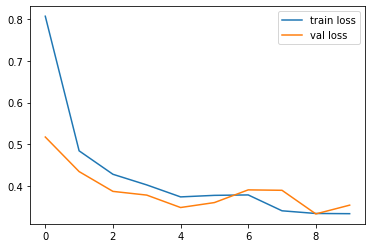

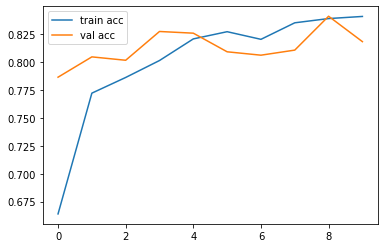

<Figure size 432x288 with 0 Axes>

In [25]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [26]:
from tensorflow.keras.models import load_model

model.save('model1.h5')

In [ ]:
pwd

In [27]:
y_pred = model.predict(test_set)

In [28]:
y_pred

array([[9.9931300e-01, 6.8705645e-04],
       [1.8432635e-01, 8.1567365e-01],
       [5.2594513e-01, 4.7405487e-01],
       ...,
       [9.9885428e-01, 1.1457726e-03],
       [4.7394302e-02, 9.5260572e-01],
       [9.9432242e-01, 5.6775967e-03]], dtype=float32)

In [29]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [30]:
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,

In [31]:
len(y_pred)

660

In [32]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [34]:

model1=load_model('model1.h5')

In [45]:
img=image.load_img(r'C:/Users/rakes/Desktop/skin/skin_data/train/benign/42.jpg',target_size=(224,224))

In [46]:

x=image.img_to_array(img)
x

array([[[105.,  68.,  50.],
        [109.,  74.,  55.],
        [122.,  84.,  73.],
        ...,
        [146., 101.,  96.],
        [146., 101.,  95.],
        [142., 100.,  88.]],

       [[110.,  72.,  59.],
        [110.,  73.,  57.],
        [115.,  77.,  64.],
        ...,
        [147., 102.,  96.],
        [145., 100.,  95.],
        [144., 101.,  94.]],

       [[111.,  75.,  63.],
        [117.,  80.,  64.],
        [122.,  85.,  69.],
        ...,
        [147., 105.,  93.],
        [146., 103.,  94.],
        [142., 102.,  94.]],

       ...,

       [[ 77.,  42.,  40.],
        [ 81.,  46.,  40.],
        [ 81.,  46.,  40.],
        ...,
        [108.,  76.,  63.],
        [104.,  68.,  56.],
        [ 98.,  60.,  47.]],

       [[ 72.,  41.,  38.],
        [ 78.,  43.,  39.],
        [ 78.,  46.,  33.],
        ...,
        [107.,  70.,  61.],
        [101.,  65.,  53.],
        [ 98.,  61.,  42.]],

       [[ 71.,  40.,  37.],
        [ 75.,  41.,  40.],
        [ 77.,  

In [47]:
x.shape

(224, 224, 3)

In [48]:

x=x/255

In [49]:
from keras.applications.resnet50 import preprocess_input

In [50]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [51]:
model1.predict(img_data)

array([[0., 1.]], dtype=float32)

In [42]:
a=np.argmax(model.predict(img_data), axis=1)

In [44]:
if(a==1):
    print("malignant")
else:
    print("benign")

malignant
